In [3]:
# Importing neccesary libraries for Data manipulation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
#Loading our dataset to a dataframe format
data=pd.read_csv('train.csv')

In [5]:
# Visualizing our data
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
# Determining our missing values sum
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# Replacing our missing age with the mean Age
data['Age']=data['Age'].replace(np.NaN,np.mean(data['Age']))

Dropping unnneccesary columns and missing value

In [8]:
data= data.drop(['Name'], axis=1)  

In [9]:
data= data.drop(['Cabin'], axis=1)

In [10]:
data=data.dropna(subset='Embarked')

In [11]:
data= data.drop(['Ticket'], axis=1)

Preprocessing our categorical variable by Encoding them using OneHotEncoder

In [12]:

from sklearn.preprocessing import OneHotEncoder

# Create an instance of OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

# Select the categorical columns to be encoded
cat_column = data[['Sex','Embarked']]

# Fit and transform the encoder on the categorical column
encoded_cat_column = encoder.fit_transform(cat_column)

# Create a new dataframe with the encoded column
data= pd.concat([data.drop(['Sex', 'Embarked'], axis=1), pd.DataFrame(encoded_cat_column)], axis=1)


In [13]:
# Our new Encoded data
data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,0,1,2,3,4
0,1.0,0.0,3.0,22.000000,1.0,0.0,7.2500,0.0,1.0,0.0,0.0,1.0
1,2.0,1.0,1.0,38.000000,1.0,0.0,71.2833,1.0,0.0,1.0,0.0,0.0
2,3.0,1.0,3.0,26.000000,0.0,0.0,7.9250,1.0,0.0,0.0,0.0,1.0
3,4.0,1.0,1.0,35.000000,1.0,0.0,53.1000,1.0,0.0,0.0,0.0,1.0
4,5.0,0.0,3.0,35.000000,0.0,0.0,8.0500,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
888,889.0,0.0,3.0,29.699118,1.0,2.0,23.4500,0.0,1.0,0.0,1.0,0.0
889,890.0,1.0,1.0,26.000000,0.0,0.0,30.0000,NaN,NaN,NaN,NaN,NaN
890,891.0,0.0,3.0,32.000000,0.0,0.0,7.7500,NaN,NaN,NaN,NaN,NaN
61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,1.0


In [14]:
# Looks like we have some missing values 
data.isnull().sum()

PassengerId    2
Survived       2
Pclass         2
Age            2
SibSp          2
Parch          2
Fare           2
0              2
1              2
2              2
3              2
4              2
dtype: int64

In [15]:
# Dropping missing values since they are small and are on the same row
data=data.dropna()

Splitting our data to dependent and independent Variables

In [16]:
X=data.drop('Survived', axis=1)

In [17]:
X # Our indenpendent Variable

,PassengerId,Pclass,Age,SibSp,Parch,Fare,0,1,2,3,4
0,1.0,3.0,22.000000,1.0,0.0,7.2500,0.0,1.0,0.0,0.0,1.0
1,2.0,1.0,38.000000,1.0,0.0,71.2833,1.0,0.0,1.0,0.0,0.0
2,3.0,3.0,26.000000,0.0,0.0,7.9250,1.0,0.0,0.0,0.0,1.0
3,4.0,1.0,35.000000,1.0,0.0,53.1000,1.0,0.0,0.0,0.0,1.0
4,5.0,3.0,35.000000,0.0,0.0,8.0500,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
884,885.0,3.0,25.000000,0.0,0.0,7.0500,0.0,1.0,0.0,0.0,1.0
885,886.0,3.0,39.000000,0.0,5.0,29.1250,1.0,0.0,0.0,0.0,1.0
886,887.0,2.0,27.000000,0.0,0.0,13.0000,1.0,0.0,0.0,0.0,1.0
887,888.0,1.0,19.000000,0.0,0.0,30.0000,0.0,1.0,1.0,0.0,0.0


In [18]:
y=data['Survived']

In [19]:
y  # Our Dependent variable

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
884    0.0
885    0.0
886    0.0
887    1.0
888    0.0
Name: Survived, Length: 887, dtype: float64

# Logistic Regression

In [20]:
from sklearn.model_selection import train_test_split   # importing library for splitting our test and train 

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3, random_state=5)

In [19]:
from sklearn.linear_model import LogisticRegression   # Importing our linear model
from sklearn.model_selection import GridSearchCV    # Importing our hyperparameter tuning library


# Setting some parameters for 
param_lrg = {
    'penalty': ['l1', 'l2'], 
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}


In [20]:
lrg=LogisticRegression()

In [21]:
grid_lrg = GridSearchCV(estimator=lrg, param_grid=param_lrg, cv=5, scoring='accuracy')
grid_lrg.fit(X_train, y_train)  # Fitting our training data to our model


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [22]:
print(f"Best hyperparameters: {grid_lrg.best_params_}")  # determining our best parameter
print(f"Best score: {grid_lrg.best_score_}")   # Our Best score


Best hyperparameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best score: 0.6887096774193548


In [24]:
best_lrg = LogisticRegression(**grid_lrg.best_params_)    # Using our best parameters to set our new model
best_lrg.fit(X_train, y_train)     # Fit our training dataset to our new model

test_score = best_lrg.score(X_test, y_test)   # Getting our accuracy score
print(f"Test score: {test_score}")


Test score: 0.7116104868913857


## Predicting new values from our Test data set

In [24]:
df=pd.read_csv('test.csv')  # Reading our dataset to a dataframe 

In [25]:
# Doing all the preprocessing steps done for our train dataset
df=df.drop(['Name', 'Cabin', 'Ticket'], axis=1)

In [26]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Create an instance of OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

# Select the categorical columns to be encoded
cat_column = df[['Sex','Embarked']]

# Fit and transform the encoder on the categorical column
encoded_cat_column = encoder.fit_transform(cat_column)

# Create a new dataframe with the encoded column
df= pd.concat([df.drop(['Sex', 'Embarked'], axis=1), pd.DataFrame(encoded_cat_column)], axis=1)


In [27]:
df['Age']=df['Age'].replace(np.NaN, np.mean(df['Age']))

In [28]:
df['Fare']=df['Fare'].replace(np.NaN, np.mean(df['Fare']))

In [29]:
df.isnull().sum()

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
0              0
1              0
2              0
3              0
4              0
dtype: int64

In [30]:
y_pred=best_lr.predict(df)

In [31]:
predictions_df = pd.DataFrame({'PassengerId': df['PassengerId'], 'Survived': y_pred})


In [32]:
predictions_df

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,0.0
4,896,0.0
...,...,...
413,1305,0.0
414,1306,1.0
415,1307,0.0
416,1308,0.0


In [33]:
predictions_df.to_csv('LogisticRegression_prediction.csv', index=False)  # Saving our predicted value as a csv file

# Decision Tree

In [26]:
from sklearn.model_selection import train_test_split   # importing library for splitting our test and train 

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3, random_state=5)

In [27]:
from sklearn.tree import DecisionTreeClassifier   # Importing our linear model
from sklearn.model_selection import GridSearchCV    # Importing our hyperparameter tuning library


# Setting some parameters for 
params_dct = {'max_depth': [2, 3, 4, 5],
          'min_samples_leaf': [1, 2, 3, 4],
          'min_samples_split': [2, 3, 4, 5]}


In [28]:
dct=DecisionTreeClassifier()

In [29]:
dct.fit(X_train, y_train)

DecisionTreeClassifier()

In [30]:
y_pred = dct.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.6404494382022472


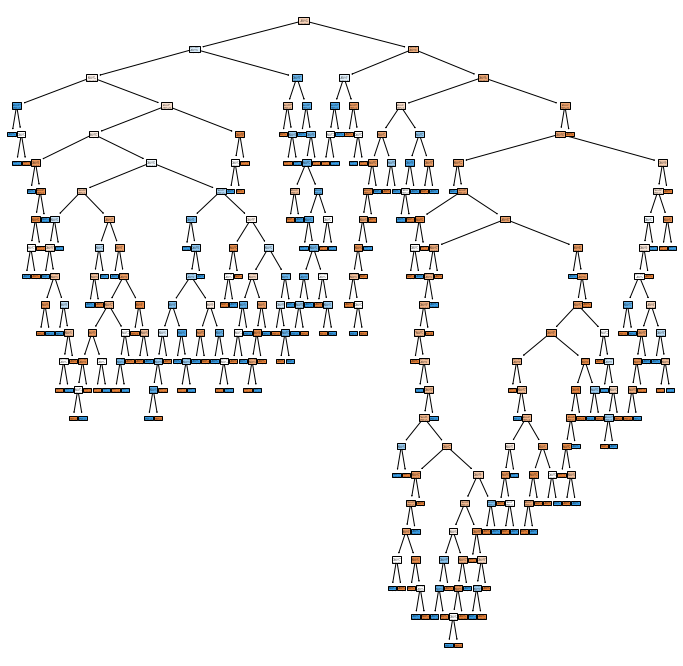

In [32]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 12))
plot_tree(dct, filled=True, ax=ax)
plt.show()


In [33]:
grid_dct = GridSearchCV(estimator=dct, param_grid=params_dct, cv=5, scoring='accuracy')
grid_dct.fit(X_train, y_train)  # Fitting our training data to our model

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4, 5]},
             scoring='accuracy')

In [35]:
print(f"Best hyperparameters: {grid_dct.best_params_}")  # determining our best parameter
print(f"Best score: {grid_dct.best_score_}")   # Our Best score


Best hyperparameters: {'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 4}
Best score: 0.6935483870967742


In [36]:
y_pred = grid_dct.best_estimator_.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.704119850187266


# Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

In [2]:
rfc.fit(X_train, y_train)

NameError: name 'rfc' is not defined

In [41]:
y_pred = rfc.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7191011235955056


In [43]:
importances = rfc.feature_importances_
print("Feature importances:", importances)

Feature importances: [0.26143255 0.07822671 0.21431917 0.05175848 0.04469489 0.2664211
 0.01938512 0.01852362 0.01512738 0.01344658 0.01666439]


In [44]:
params_rfc = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [2, 4, 6, 8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}


In [46]:
grid_rfc = GridSearchCV(rfc, params_rfc, cv=5, scoring='accuracy', n_jobs=-1)

In [47]:
grid_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='accuracy')

In [48]:
print("Best hyperparameters:", grid_rfc.best_params_)
print("Best score:", grid_rfc.best_score_)

Best hyperparameters: {'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best score: 0.7241935483870968


In [49]:
grid_rfc.best_estimator_

RandomForestClassifier(max_depth=6, min_samples_leaf=2, random_state=42)

In [50]:
y_pred = grid_rfc.best_estimator_.predict(X_test)

In [51]:
from sklearn.metrics import accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7453183520599251


# Support Vector Machine

In [21]:
from sklearn import svm

In [22]:
svmc = svm.SVC(kernel='linear', C=1, random_state=42)
svmc.fit(X_train, y_train)

SVC(C=1, kernel='linear', random_state=42)

In [23]:
y_pred = svmc.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.704119850187266


In [25]:
params_svmc = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 1, 0.1, 0.01],
    'degree': [2, 3, 4, 5],
}


In [27]:
from sklearn.model_selection import GridSearchCV
grid_svmc = GridSearchCV(svmc, params_svmc, cv=5, scoring='accuracy', n_jobs=-1)


In [ ]:
grid_svmc.fit(X_train, y_train)


In [ ]:
print("Best hyperparameters:", grid_svmc.best_params_)
print("Best score:", grid_svmc.best_score_)


In [ ]:
y_pred = grid_svmc.best_estimator_.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))
